# Fit-Vorlesung EDV für Physikerinnen und Pkysiker 22.01.2020

## Einfaches Anpassen - Mittelwert und Standardabweichung

Nehmen wir ein Beispiel mit Daten aus einer Datei, wobei wir hier Messwerte mit Fehlern haben. Nehmen wir an, die Messwerte wurden in gleichen Zeitabständen genommen.

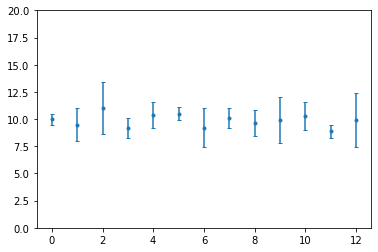

In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('data/data.txt')

x_data = data[:,0]
y_data = data[:,1]
err_data = data[:,2]

plt.ylim(0,20)
plt.errorbar(x_data, y_data, yerr=err_data, capsize=2, fmt='.');

Die Daten suggerieren, dass bei jeder Messung immer der gleiche physikalische Zustand gemessen wurde. In so einem Fall ist die einfachste Anpassung, die Berechnung des Mittelwerts und die Standardabweichung:

$$ \bar{y} = \frac{1}{n}\sum_{i=0}^{n} y_i \textrm{  und  } \sigma^2 = \frac{1}{n-1} \sum_{i=0}^{n} (y_i-\bar{y})^2 $$

Für diese Daten kann man das leicht mit `numpy` berechnen:

Mittelwert ist: 9.884615384615385 +/- 0.5722373819506861


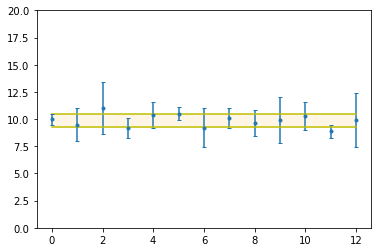

In [38]:
mean = y_data.mean()   # Mittelwert
stddev = y_data.std()  # Standardabweichung

print('Mittelwert ist: {} +/- {}'.format(mean, stddev))

# define the fill area
a_p = np.array([mean+stddev] * x_data.shape[0])
a_m = np.array([mean-stddev] * x_data.shape[0])

plt.plot(x_data, a_p, 'y')
plt.plot(x_data, a_m, 'y')
plt.fill_between(x_data, a_p, a_m, color="orange",alpha=0.1)

plt.ylim(0,20)
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], capsize=2, fmt='.');

Man sieht, dass in diesem Beispiel alle Datenpunkte mit ihren Fehlern im dem Bereich des Mittelwertes und der Standardabweichung liegen. Somit sollte der Mittelwert die Daten repräsentieren.

## Geradenanpassung - Teil 1

Als nächstes Beispiel nehmen wir Daten mit Fehlern, wobei die einzelnen Datenpunkte offensichtlich auf einer Gerade liegen sollen. 

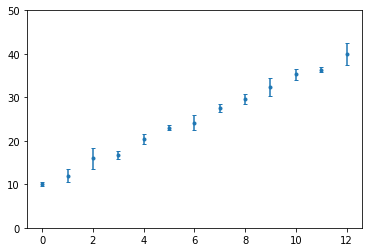

In [42]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('data/data.txt')

x_data = data[:,0]
y_data = data[:,1] + x_data*2.5   # Daten auf eine Gerade verlegen
err_data = data[:,2]

plt.ylim(0, 50)
plt.errorbar(x_data, y_data, yerr=err_data, capsize=2, fmt='.');

Graphisch ohne Computer kann man leicht eine Ausgleichsgerade inklusive einer Geraden mit minimaler und maximaler Steigung für die Fehler berechnen.

Mit dem Computer ist es ein wenig aufwendiger. Schauen wir uns zunächst folgende Funktion an:

In [52]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def line(x, a, b):
    return x*a + b    

Mit `line` wird eine Geradenfunktion definiert, die als Parameter die Steigung `a` und den Offset `b` hat:
$$y = a x + b$$

Sie können diese Funktion, um Datenpunkte passend zu den vorgegebenen `x`-Werten zu erzeugen (Genaueres zu dieser Funktion kommt später):

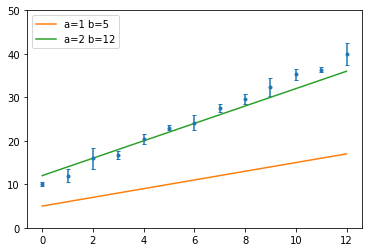

In [53]:
plt.ylim(0, 50)
plt.errorbar(x_data, y_data, yerr=err_data, capsize=2, fmt='.');
plt.plot(x_data, line(x_data, 1, 5), label=r'a=1 b=5')
plt.plot(x_data, line(x_data, 2, 12), label=r'a=2 b=12')
plt.legend(loc='upper left')

In dem obigen Beispiel werden zwei Beispiel-Geraden erzeugt, eine mit der Steigung 1 und dem Offset 5 (rot) und eine mit der Steigung 2 und dem Offset 12 (grün). Die grüne Gerade sieht schon in etwa passend zu den Datenpunkten aus dem Datensatz aus.  

Man kann an dieser Stelle rumprobieren, bis man den richtigen Parametersatz für eine Gerade gefunden hat, mit der alle Datenpunkte innerhalb der Fehler auf der Geraden liegen, aber dafür hat man ja den Computer, der das für einen machen soll!

## Methode der kleinsten Quadrate

Wie oben gezeigt, kann man sich mit der Funktion `line` Beispiel-Geraden erzeugen. Wie kann man herausbekommen, ob diese Gerade mit den Datenpunkten übereinstimmt? 

Die Antwort ist einfach, man bestimmt den statistischen `Abstand` zwischen der Gerade und den Datenpunkten. Dazu wird ähnlich der Standardabweichung für jeden einzelnen Wert das Quadrat der Differenz zwischen Datenpunkt und entsprechendem Geradenpunkt (Residual) berechnet und aufsummiert:

$$ S = \sum_{i=1}^n (y_i-\textrm{line}(x_i,a,b))^2 $$ 

Für die beiden Geraden sieht es dann so aus: 

In [59]:
red_S = ((y_data - line(x_data, 1, 5))**2).sum()
green_S = ((y_data - line(x_data, 2, 12))**2).sum()

print('rote Gerade : S={}'.format(red_S))
print('grüne Gerade: S={}'.format(green_S))

rote Gerade : S=2901.0299999999997
grüne Gerade: S=53.62999999999996


Wie man gut sehen kann, ist der Abstand der grünen Gerade von den Datenpunkten kleiner als der Abstand der roten Geraden. Paar von Parametern

Offensichtlich wäre der Abstand `0`, wenn es gelingen würde, eine Gerade zu finden, die exakt auf allen Datenpunkten liegen würde. Dieses ist bei reellen Daten in der Regel unmöglich, allerdings wäre ein Ziel, den Abstand so zu minimieren, dass die Gerade den Datenpunkten so nah wie möglich kommt! 